In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load Dataset

In [2]:
data=pd.read_csv('delivery_time.csv')

In [3]:
data.head()
data.columns=['Delivery_Time','Sorting_Time']

In [4]:
data.info()
#No nan values present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data['Delivery_Time']=np.log1p(data['Delivery_Time'])
data.head()

,Delivery_Time,Sorting_Time
0,1.408800,10
1,1.301321,4
2,1.394398,6
3,1.439569,9
4,1.481877,10


# Visualize the Data

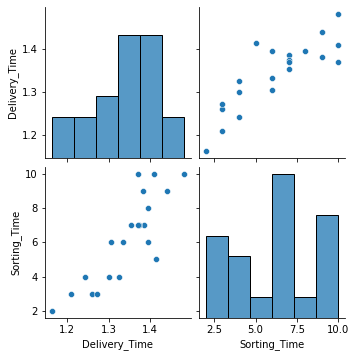

In [8]:
sns.pairplot(data)

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

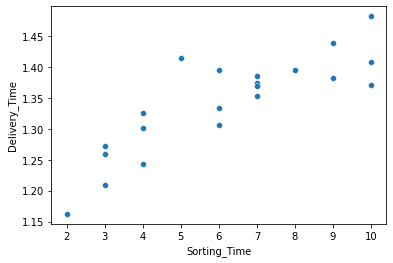

In [9]:
sns.scatterplot(data['Sorting_Time'],data['Delivery_Time'])
#if Sorting time is increased then Delivery Time is also increasing

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

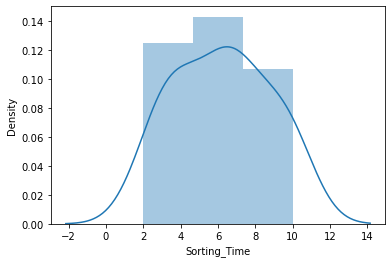

In [10]:
sns.distplot(data['Sorting_Time'])
#data is almost symmetric.

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time'>

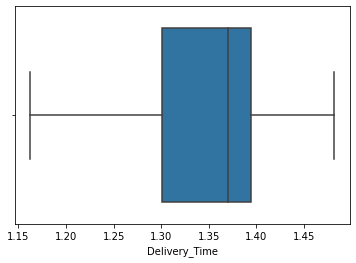

In [11]:
sns.boxplot(data['Delivery_Time'])
#no outliers are present in dataset

<AxesSubplot:>

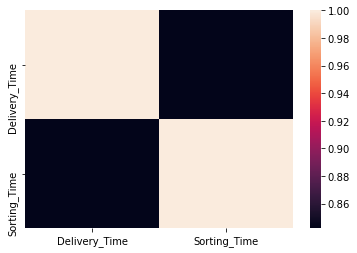

In [12]:
sns.heatmap(data.corr())

In [12]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Build Model 

In [13]:
import statsmodels.formula.api as sm

In [14]:
model=sm.ols('Delivery_Time~Sorting_Time',data).fit()

In [15]:
model.params

Intercept       1.179609
Sorting_Time    0.026237
dtype: float64

In [16]:
print(model.tvalues,'\n',model.pvalues)
# here p value of Sorting Time is less than 0.05 so it is significant variable.

Intercept       45.949854
Sorting_Time     6.816031
dtype: float64 
 Intercept       6.115195e-21
Sorting_Time    1.658375e-06
dtype: float64


C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

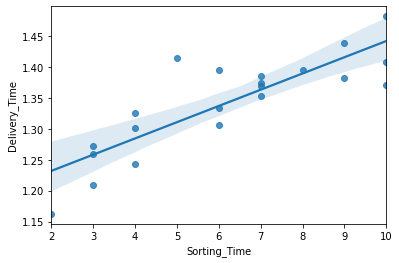

In [17]:
sns.regplot(data['Sorting_Time'],data['Delivery_Time'])

In [18]:
model.rsquared
# model is not that much excellent.

0.7097387611728736

# Predict for New Points

In [19]:
new_data=pd.DataFrame({'Sorting_Time':[11,5,1,4]})

In [20]:
model.predict(new_data)

0    1.468222
1    1.310797
2    1.205847
3    1.284559
dtype: float64